In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [4]:
# Load the Excel workbook
excel_file = "Russia_Ukraine_War_Dataset_Full.xlsx"  # Replace with your file path

# Load all sheet names
xlsx = pd.ExcelFile(excel_file)

# Loop through each sheet and save as CSV
for sheet_name in xlsx.sheet_names:
    df = pd.read_excel(excel_file, sheet_name=sheet_name)
    df.to_csv(f"{sheet_name}.csv", index=False)
    print(f"Saved {sheet_name}.csv")


Saved Casualties.csv
Saved Refugees.csv
Saved Equipment Losses.csv
Saved Territorial Control.csv
Saved International Aid.csv
Saved Key Events.csv
Saved Sanctions.csv


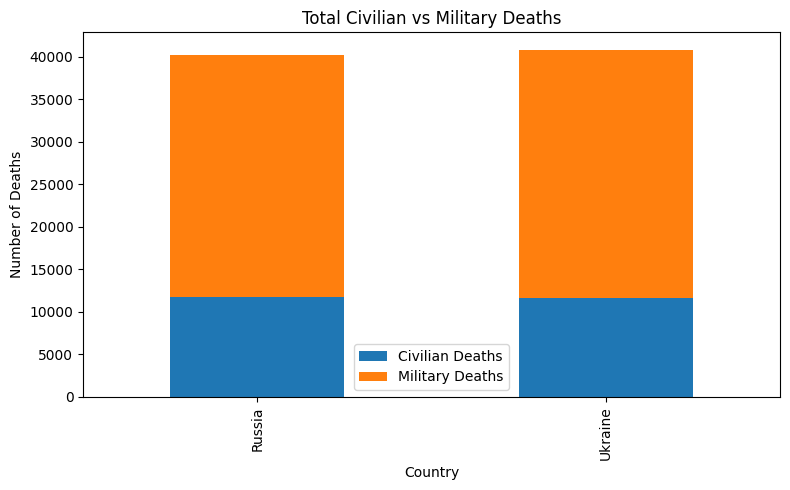

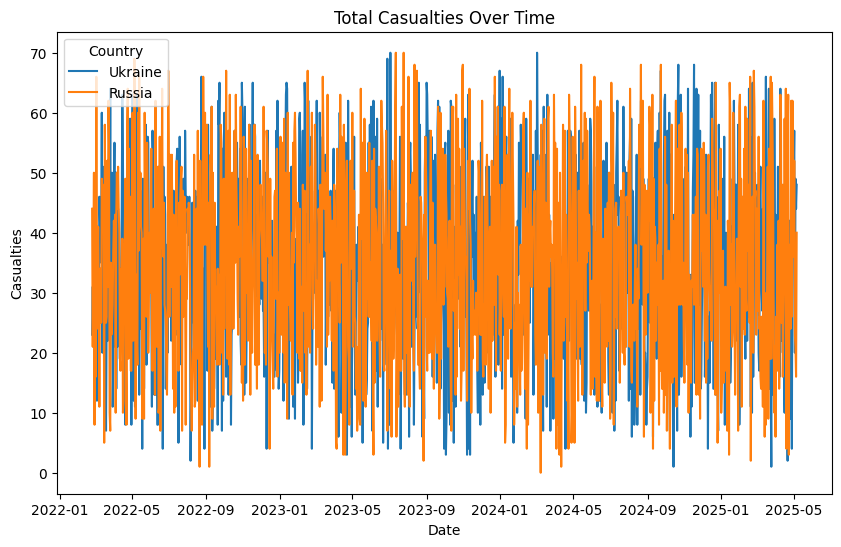

In [5]:
# ========== 1. Casualties ==========
casualties = xlsx.parse("Casualties")
casualties['Date'] = pd.to_datetime(casualties['Date'])
casualties['Total Casualties'] = casualties['Civilian Deaths'] + casualties['Military Deaths']

# Matplotlib Stacked Bar
casualty_sum = casualties.groupby('Country')[['Civilian Deaths', 'Military Deaths']].sum()
casualty_sum.plot(kind='bar', stacked=True, figsize=(8,5), title="Total Civilian vs Military Deaths")
plt.ylabel("Number of Deaths")
plt.tight_layout()
plt.show()

# Seaborn Line Chart Over Time
plt.figure(figsize=(10,6))
sns.lineplot(data=casualties, x="Date", y="Total Casualties", hue="Country")
plt.title("Total Casualties Over Time")
plt.ylabel("Casualties")
plt.show()

# Plotly Pie Chart
casualty_pie = casualties.groupby('Country')['Total Casualties'].sum().reset_index()
px.pie(casualty_pie, names='Country', values='Total Casualties', title="Casualty Share by Country").show()

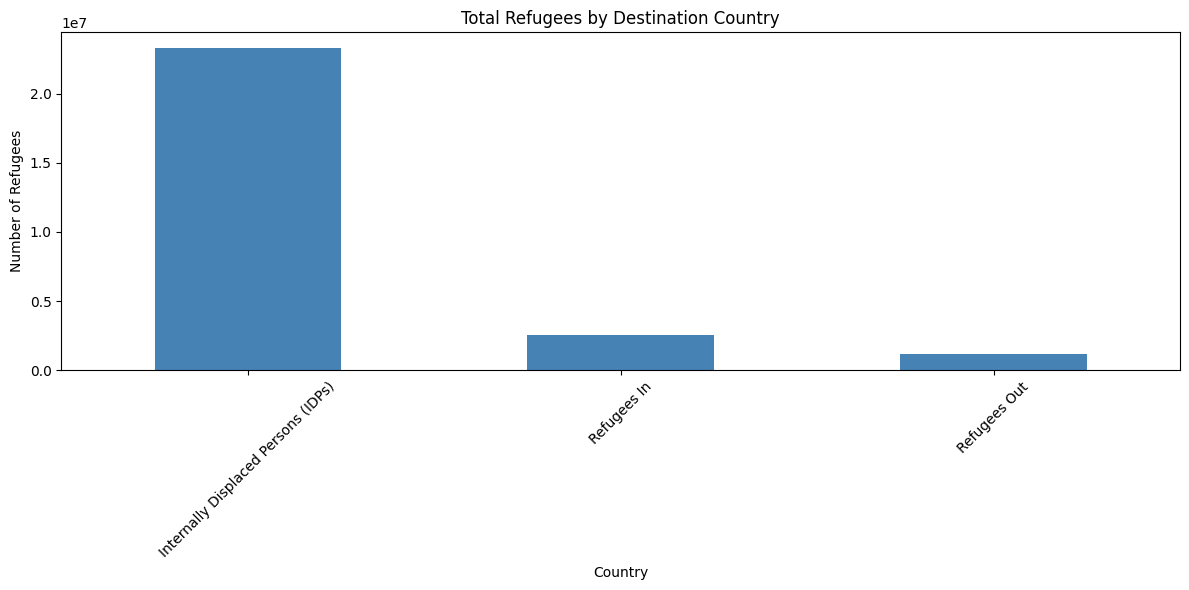

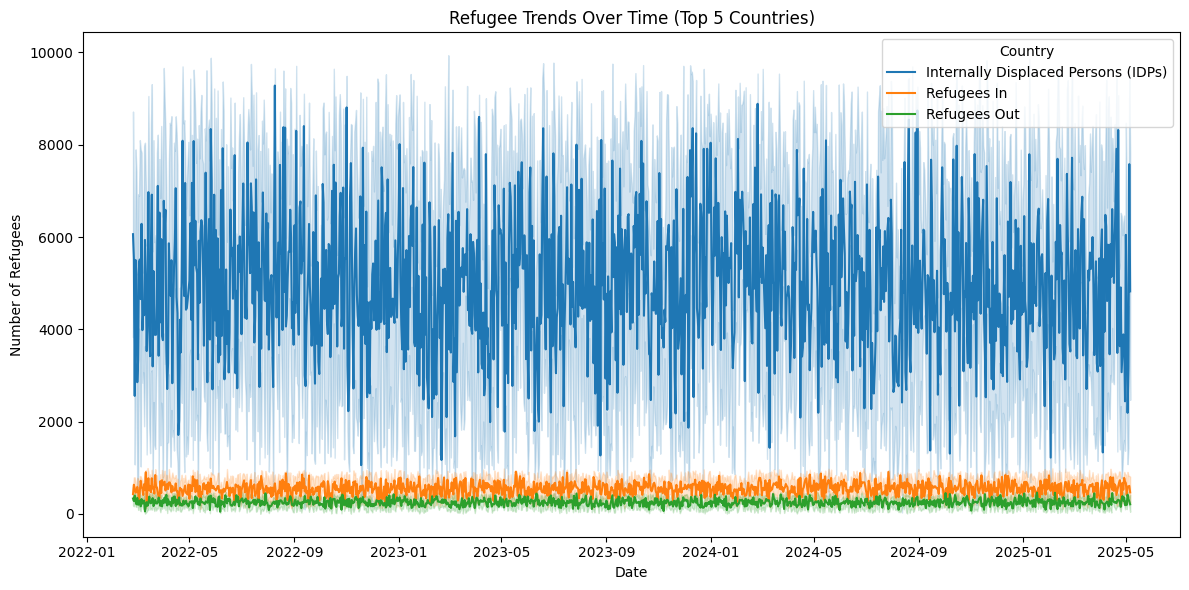

In [9]:
# refugees sitution

# Load the "Refugees" sheet if not already loaded
refugees = xlsx.parse("Refugees")
refugees['Date'] = pd.to_datetime(refugees['Date'])

#  bar chart
refugee_numeric = refugees.select_dtypes(include='number').copy()
refugee_totals = refugee_numeric.sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
refugee_totals.plot(kind='bar', color='steelblue')
plt.title("Total Refugees by Destination Country")
plt.xlabel("Country")
plt.ylabel("Number of Refugees")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# line chart 
top5_countries = refugee_totals.head(5).index.tolist()
refugees_top5 = refugees[['Date'] + top5_countries]
refugees_melted = refugees_top5.melt(id_vars='Date', var_name='Country', value_name='Refugees')
plt.figure(figsize=(12, 6))
sns.lineplot(data=refugees_melted, x='Date', y='Refugees', hue='Country')
plt.title("Refugee Trends Over Time (Top 5 Countries)")
plt.xlabel("Date")
plt.ylabel("Number of Refugees")
plt.tight_layout()
plt.show()


#  Pie Chart

refugee_pie_df = refugee_totals.reset_index()
refugee_pie_df.columns = ['Country', 'Refugees']
fig = px.pie(refugee_pie_df,
             names='Country',
             values='Refugees',
             title='Refugee Distribution by Country',
             hole=0.3)
fig.show()

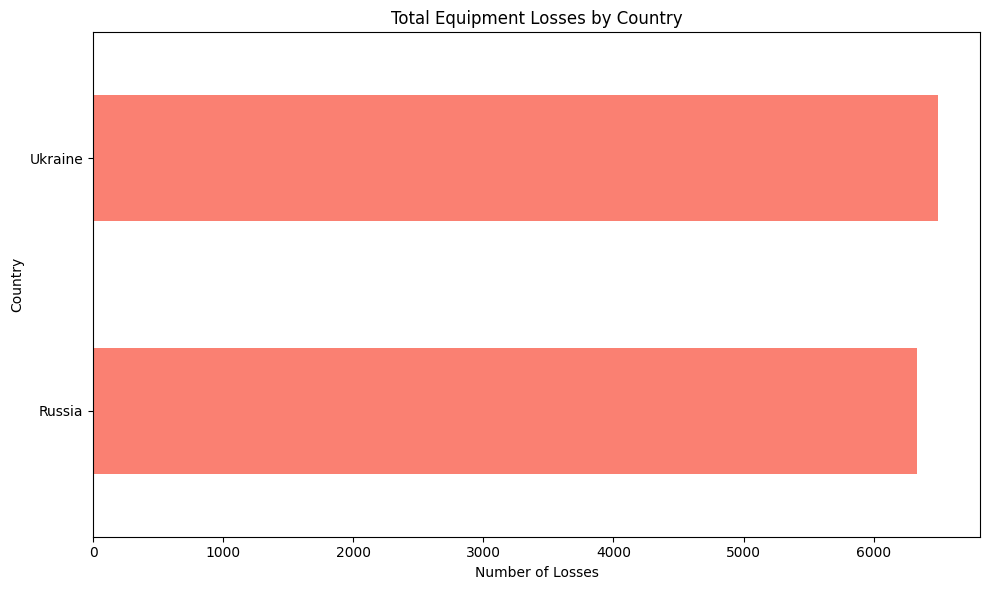

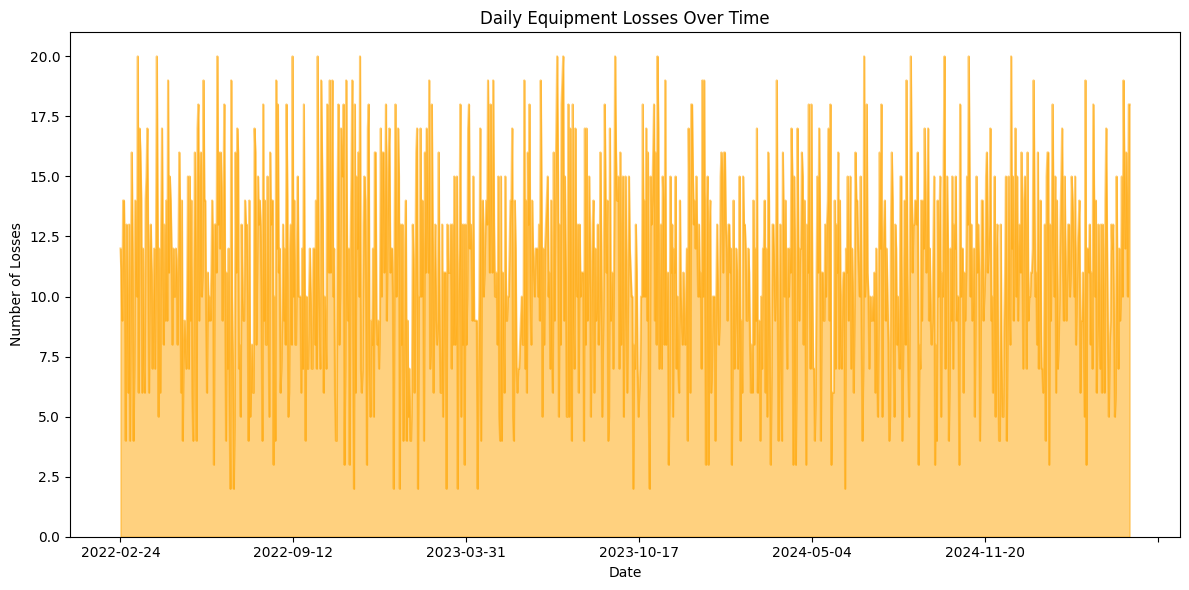

In [12]:
# Load the Equipment Losses sheet
equipment = xlsx.parse("Equipment Losses")

# Only use the numeric column for losses
if 'Quantity Lost' in equipment.columns:
    # Equipment losses by country
    country_totals = equipment.groupby('Country')['Quantity Lost'].sum().sort_values()

    plt.figure(figsize=(10, 6))
    country_totals.plot(kind='barh', color='salmon')
    plt.title("Total Equipment Losses by Country")
    plt.xlabel("Number of Losses")
    plt.ylabel("Country")
    plt.tight_layout()
    plt.show()

    # Equipment Losses Over Time
    if 'Date' in equipment.columns:
        daily_loss = equipment.groupby('Date')['Quantity Lost'].sum()

        plt.figure(figsize=(12, 6))
        daily_loss.plot(kind='area', stacked=False, color='orange')
        plt.title("Daily Equipment Losses Over Time")
        plt.xlabel("Date")
        plt.ylabel("Number of Losses")
        plt.tight_layout()
        plt.show()

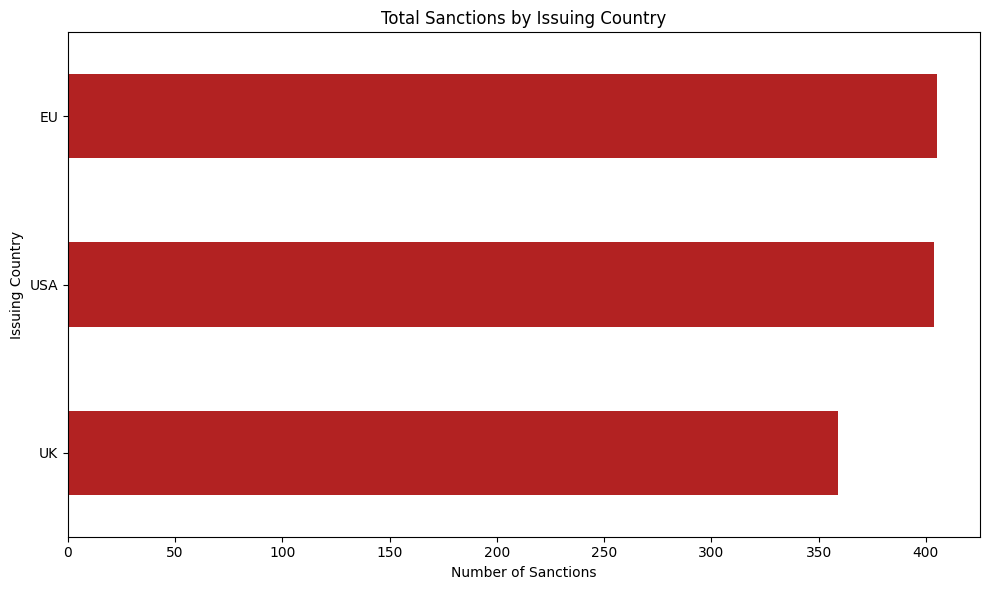

In [16]:
# Sanctions analysis

sanctions = df  # Use the sanctions dataframe
country_col = 'Issuing Country'
value_col = 'Target Country'  # We'll count the number of sanctions per country
sanction_type_col = 'Sanction Type'

# Bar Chart: Number of sanctions issued by each country
country_counts = sanctions[country_col].value_counts().sort_values()

plt.figure(figsize=(10, 6))
country_counts.plot(kind='barh', color='firebrick')
plt.title("Total Sanctions by Issuing Country")
plt.xlabel("Number of Sanctions")
plt.ylabel("Issuing Country")
plt.tight_layout()
plt.show()

# Donut Chart of Sanction Types
sanction_types = sanctions[sanction_type_col].value_counts().reset_index()
sanction_types.columns = ['Type', 'Total']

import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(
    labels=sanction_types['Type'],
    values=sanction_types['Total'],
    hole=0.4,
    textinfo='label+percent+value'
)])
fig.update_layout(title_text="Sanctions by Type")
fig.show()

In [ ]:
# Convert ipynb file to pdf
